In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Genetic drift

In [ ]:
# pop_size - population size, p - allele A frequency, num_of_generation - number of generation

def WF_simulation(pop_size, p, num_of_generations):

    # allele B frequency
    q = 1 - p

    # initialisation
    # list of randomly chosen 0 (A allele) and 1 (B allele)
    population = np.random.choice([0, 1], size = pop_size, p = [p, q])

    A_freq = []
    B_freq = []

    for generation in range(num_of_generations):
        # calculate allele frequencies
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size

        # save A and B allele's frequencies for current generation
        A_freq.append(freq_A)
        B_freq.append(freq_B)

        #  select randomly individual for the next generation based on previous generation
        next_generation = np.random.choice(population, size=pop_size)

        population = next_generation

    return A_freq, B_freq

##  1.a Trace the allele frequencies over time;

In [ ]:
a_freq, b_freq = WF_simulation(1000000, 0.5, 10000)

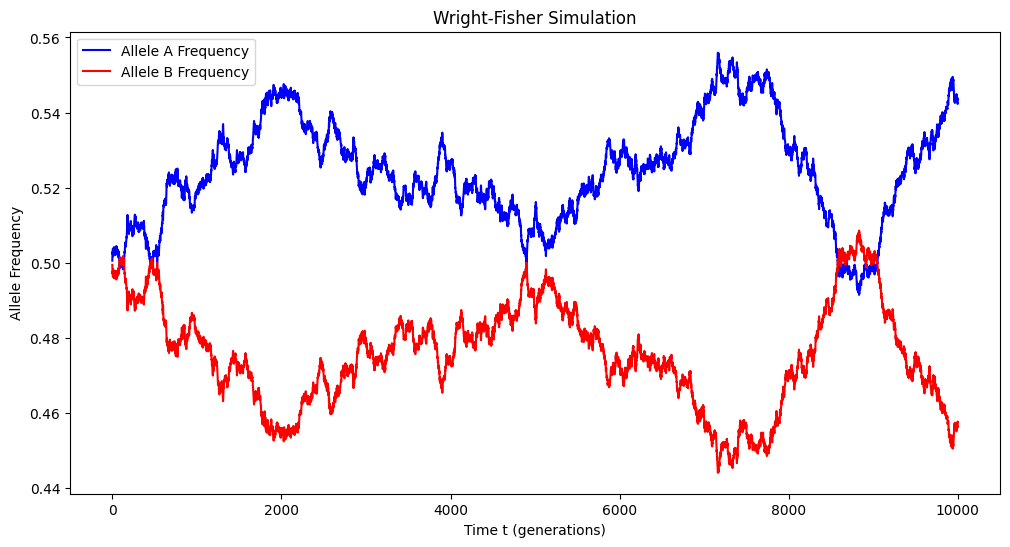

In [ ]:
plot_frequencys(a_freq, b_freq)

In [ ]:
a_freq_test100, b_freq_test100, t_fix_test100 = WF_simulation_until_fixation(100, 0.5)

In [ ]:
def plot_frequencys(A_allele, B_allele):
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(A_allele)), A_allele, label='Allele A Frequency', linestyle='-', color='blue')
    plt.plot(range(len(B_allele)), B_allele, label='Allele B Frequency', linestyle='-', color='red')
    plt.title('Wright-Fisher Simulation')
    plt.xlabel('Time t (generations)')
    plt.ylabel('Allele Frequency')
    plt.legend()
    plt.show()

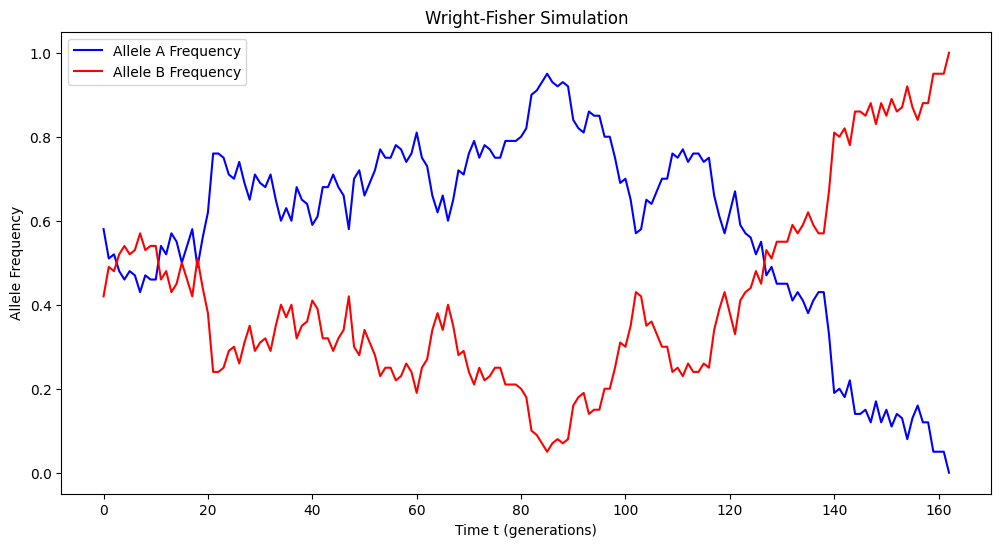

In [ ]:
plot_frequencys(a_freq_test100, b_freq_test100)

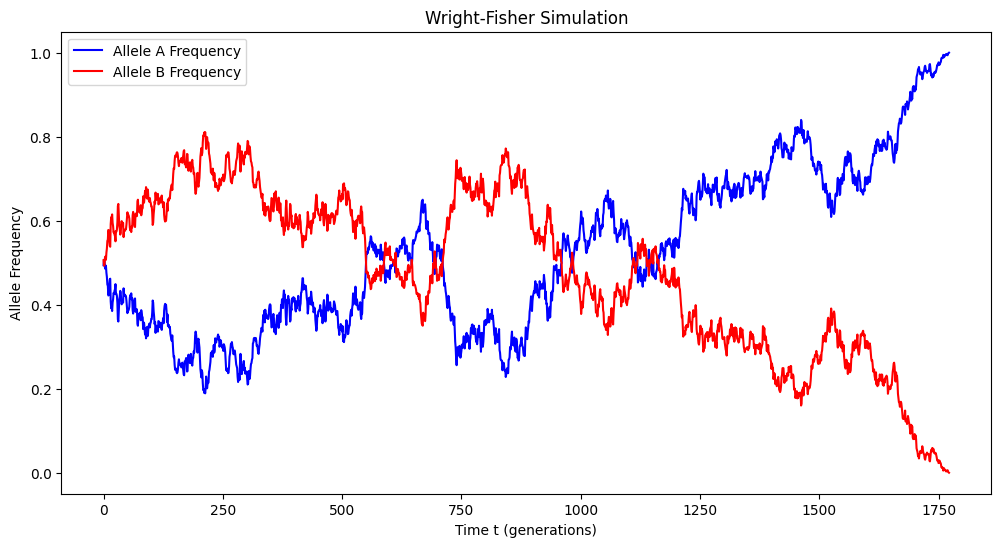

In [ ]:
a_freq_test1000, b_freq_test1000, t_fix_test1000 = WF_simulation_until_fixation(1000, 0.5)
plot_frequencys(a_freq_test1000, b_freq_test1000)

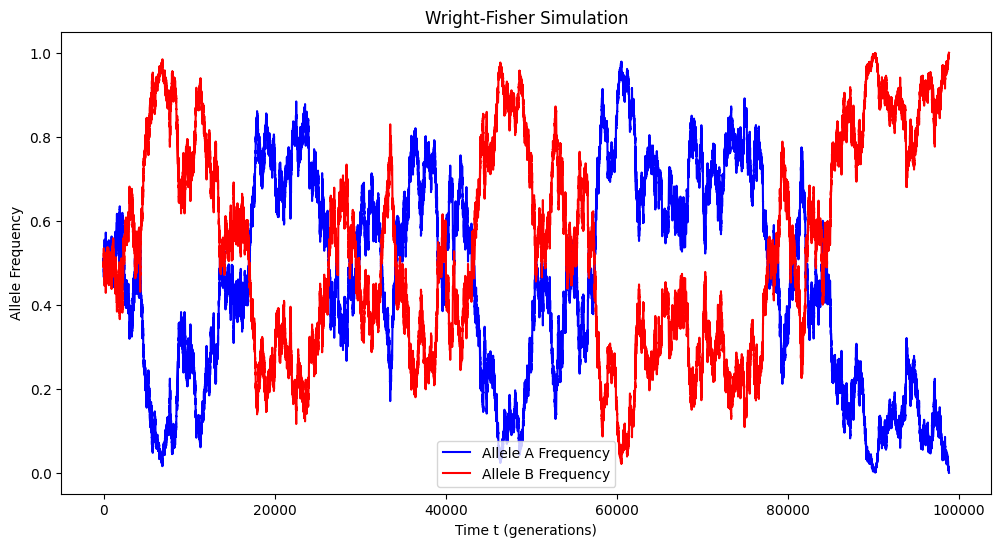

In [ ]:
a_freq_test10000, b_freq_test10000, t_fix_test10000 = WF_simulation_until_fixation(10000, 0.5)
plot_frequencys(a_freq_test10000, b_freq_test10000)

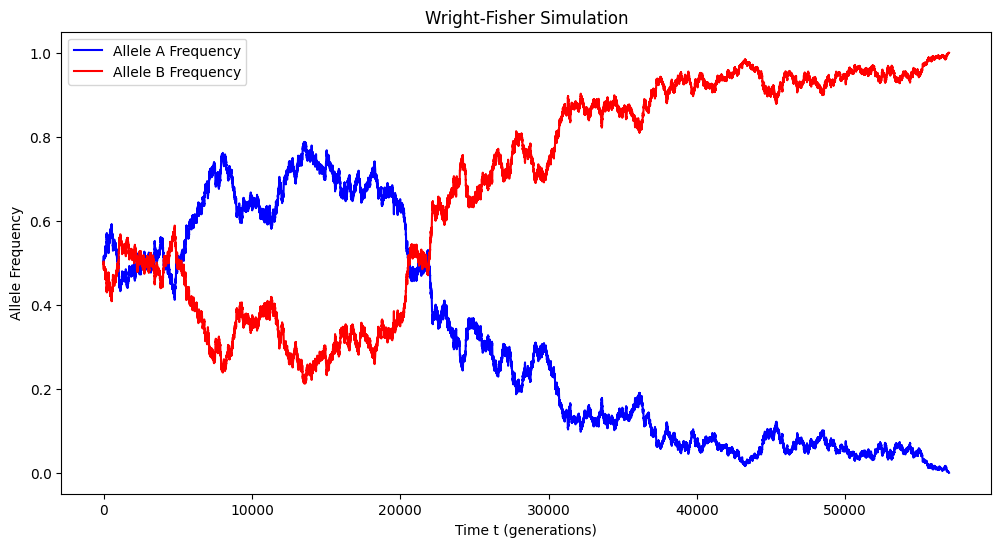

In [ ]:
a_freq_test50000, b_freq_test50000, t_fix_test50000 = WF_simulation_until_fixation(50000, 0.5)
plot_frequencys(a_freq_test50000, b_freq_test50000)

In [ ]:
t_fix_test50000

56994

## 1.b Determine the fixation probability of allele A in dependence of p

In [ ]:
# pop_size - population size, p - allele A frequency, do not precise the number of generations
# function stops when one of the alleles fixe (A or B)

def WF_simulation_until_fixation(pop_size, p):

    # allele B frequency
    q = 1 - p

    # initialisation
    # list of randomly chosen 0 (A allele) and 1 (B allele)
    population = np.random.choice([0, 1], size = pop_size, p = [p, q])

    A_freq = []
    B_freq = []

    # flag == 0 while A frequency != (0 or 1) (while no fixation)
    flag = 0
    # t will count the number of generations before fixation
    t = 0

    while flag == 0:
        # calculate allele frequencies
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size

        # save A and B allele's frequencies for current generation
        A_freq.append(freq_A)
        B_freq.append(freq_B)

        if (freq_A == 0) or (freq_A == 1):
          flag = 1
        else:
          #  select randomly individual for the next generation based on previous generation
          next_generation = np.random.choice(population, size=pop_size)
          population = next_generation
          t += 1

    return A_freq, B_freq, t

In [ ]:
a_freq_test, b_freq_test, t_test = WF_simulation_until_fixation(1000, 0.5)

In [ ]:
p_list = []
for i in range(1, 10):
    p_list.append(i / 10.0)
p_list

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
a_fixed_proba = []
number_of_simulations = 1000
for p in p_list:
  a_fixed_times = 0
  for i in range(number_of_simulations):
    a_freq_test, b_freq_test, t_test = WF_simulation_until_fixation(1000, p)
    a_fixed_times += a_freq_test[-1]
  a_fixed_proba.append(round(a_fixed_times/1000, 3))

In [ ]:
a_fixed_proba

[0.09, 0.188, 0.281, 0.402, 0.472, 0.615, 0.69, 0.795, 0.904]

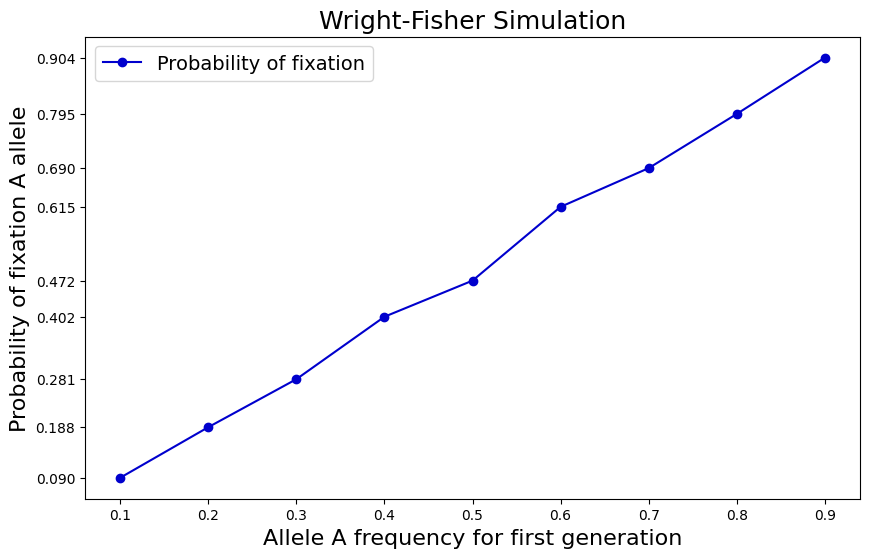

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(p_list, a_fixed_proba, label='Probability of fixation', marker='o', linestyle='-', color='mediumblue')

plt.title('Wright-Fisher Simulation', fontsize=18)
plt.xlabel('Allele A frequency for first generation', fontsize=16)
plt.ylabel('Probability of fixation A allele', fontsize=16)
plt.yticks(a_fixed_proba)
plt.legend(fontsize=14)
plt.show()

## 1.c Estimate the expected fixation time (number of generations) in dependence of N (number of haploid individuals)

In [ ]:
N_list = [100, 300, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]

In [ ]:
number_of_simulations = 1000
mean_fix_time_list = []
std_fix_time_list = []
for N in N_list:
  time_fix_list = np.zeros(number_of_simulations)
  for i in range(number_of_simulations):
    a_freq_test, b_freq_test, t_test = WF_simulation_until_fixation(N, 0.5)
    time_fix_list[i] = t_test
  mean_time_fix = np.mean(time_fix_list)
  std_time_fix = np.std(time_fix_list)
  mean_fix_time_list.append(mean_time_fix)
  std_fix_time_list.append(std_time_fix)
  print(f'For population size = {N}, expected fixation time (number of generations) = {round(mean_time_fix)} +- {round(std_time_fix)} generations \n')

For population size = 100, expected fixation time (number of generations) = 138 +- 104 generations 

For population size = 500, expected fixation time (number of generations) = 674 +- 500 generations 

For population size = 1000, expected fixation time (number of generations) = 1375 +- 1037 generations 

For population size = 2500, expected fixation time (number of generations) = 3415 +- 2547 generations 

For population size = 5000, expected fixation time (number of generations) = 7131 +- 5182 generations 

For population size = 10000, expected fixation time (number of generations) = 14173 +- 10476 generations 



In [ ]:
# function return a population with initial frequencies of A (=p) and B (=q= 1- p) alleles

def WF_initialisation(pop_size, p):
  # allele B frequency
  q = 1 - p
  # initialisation
  # list of randomly chosen 0 (A allele) and 1 (B allele)
  population = np.random.choice([0, 1], size = pop_size, p = [p, q])
  return population

# function take as input a population
# stops when one of the alleles fixe (A or B)

def WF_simulation_until_fixation(population):

    A_freq = []
    B_freq = []

    # flag == 0 while A frequency != (0 or 1) (while no fixation)
    flag = 0
    # t will count the number of generations before fixation
    t = 0
    pop_size = len(population)

    while flag == 0:
        # calculate allele frequencies
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size

        # save A and B allele's frequencies for current generation
        A_freq.append(freq_A)
        B_freq.append(freq_B)

        if (freq_A == 0) or (freq_A == 1):
          flag = 1
        else:
          #  select randomly individual for the next generation based on previous generation
          next_generation = np.random.choice(population, size=pop_size)
          population = next_generation
          t += 1

    return A_freq, B_freq, t

In [ ]:
number_of_simulations = 100
mean_fix_time_list = []
median_fix_time_list = []
std_fix_time_list = []
for N in N_list:
  time_fix_list = np.zeros(number_of_simulations)
  population_test = WF_initialisation(N, 0.5)
  for i in range(number_of_simulations):
    a_freq_test, b_freq_test, t_test = WF_simulation_until_fixation(population_test)
    time_fix_list[i] = t_test
  mean_time_fix = np.mean(time_fix_list)
  std_time_fix = np.std(time_fix_list)
  median_time_fix = np.median(time_fix_list)
  mean_fix_time_list.append(mean_time_fix)
  std_fix_time_list.append(std_time_fix)
  median_fix_time_list.append(median_time_fix)
  print(f'For population size = {N}, expected fixation time (number of generations) = {round(mean_time_fix)} +- {round(std_time_fix)} generations, median = {median_time_fix} generations \n')

For population size = 100, expected fixation time (number of generations) = 123 +- 79 generations, median = 104.5 generations 

For population size = 300, expected fixation time (number of generations) = 445 +- 296 generations, median = 384.5 generations 

For population size = 500, expected fixation time (number of generations) = 705 +- 555 generations, median = 531.5 generations 

For population size = 1000, expected fixation time (number of generations) = 1269 +- 800 generations, median = 994.5 generations 

For population size = 2000, expected fixation time (number of generations) = 2406 +- 1640 generations, median = 1807.5 generations 

For population size = 3000, expected fixation time (number of generations) = 4310 +- 3280 generations, median = 3431.5 generations 

For population size = 4000, expected fixation time (number of generations) = 5735 +- 4663 generations, median = 4144.5 generations 

For population size = 5000, expected fixation time (number of generations) = 6658 +-

In [ ]:
mean_fix_time_list_np = np.array(mean_fix_time_list)
std_fix_time_list_np = np.array(std_fix_time_list)

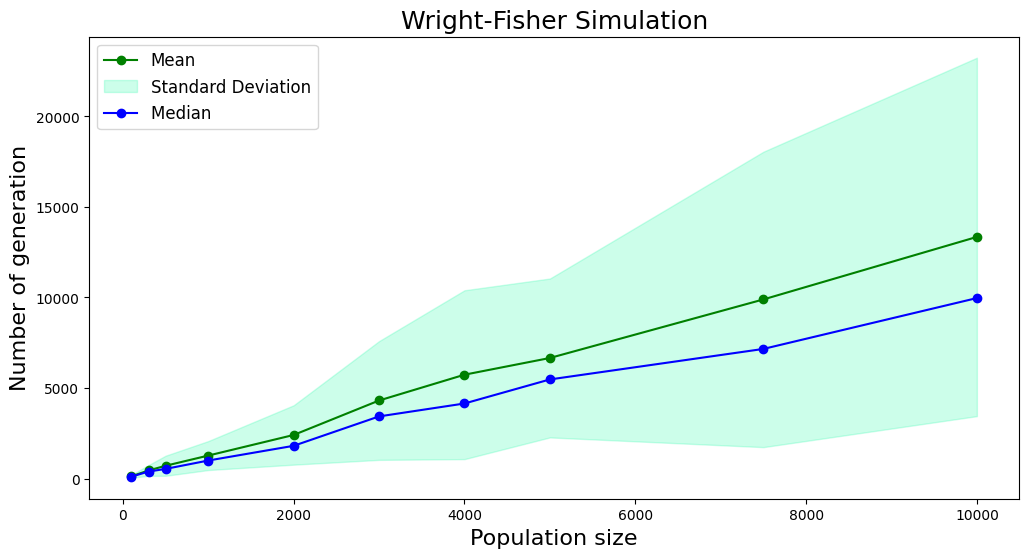

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(N_list, mean_fix_time_list, label='Mean', marker='o', linestyle='-', color='green')
plt.fill_between(N_list, mean_fix_time_list_np - std_fix_time_list_np, mean_fix_time_list_np + std_fix_time_list_np, alpha=0.2, color='mediumspringgreen',  label='Standard Deviation')
plt.plot(N_list, median_fix_time_list, label='Median ', marker='o', linestyle='-', color='blue')
plt.title('Wright-Fisher Simulation', fontsize=18)
plt.xlabel('Population size', fontsize=16)
plt.ylabel('Number of generation', fontsize=16)
#plt.yticks(mean_fix_time_list)
plt.legend(loc='upper left', fontsize=12)
plt.show()

# 2. Coalescent model

In [ ]:
# function to create populations to coalescent model
# N - number of individuals
def simulate_populations_for_CE(N):
    #initialisation (alleles from 0 to 99)
    population = np.array([[i, -1] for i in range(N)])
    populations = []
    populations.append(population)

    flag = 0

    # stop when all alleles are the same by descent (the same numbers)
    while flag == 0:

        next_generation = np.zeros((N, 2))
        # take last generation
        population = populations[-1]
        # create a list of parents for the new generation (100 random numbers from 0 to 99)
        parents = np.random.choice(N, size=N)
        n_p = 0
        # create new generation
        for individual in next_generation:
          # take parent from list of parents
          parent = parents[n_p]
          n_p += 1
          # save allele from parent
          individual[0] = population[parent][0]
          # save who was parent (position in the list of previous generation)
          individual[1] = parent

        populations.append(next_generation)
        # check if we have all alleles
        invividuals = [invividual[0] for invividual in next_generation]
        if len(set(invividuals)) == 1:
            flag = 1

    return populations

In [ ]:
check_ca_population = simulate_populations_for_CE(100)

In [ ]:
len(check_ca_population)

105

In [ ]:
# function to find MRCA for n number of samples
# n - number of samples, populations - generations of population
def find_mrca(n, populations):
    #choose n random samples (positions)
    check_parents_samples = np.random.choice(100, size=n)
    t = 1
    flag = 0
    #print (f'check_parents_samples = {check_parents_samples} \n')

    # flag will be 1 when we'll find t = generation with coalescent event
    while flag == 0:
        # take population (start with most recent(new) - it will be last list in out list of generations)
        population = populations[-t]
        parents = []
        # check parents for our chosen samples (sample will be the positions in the list, population[sample] = 2 elements[allele, parent position from previous generation])
        for sample in check_parents_samples:
            #print (sample)
            # for our samples, add their parents = [1] position
            who_was_parent = population[int(sample)][1]
            # check to save only unique parents
            if who_was_parent not in parents:
                parents.append(int(who_was_parent))
        #print (f't - {t} generation, parents = {parents} \n')
        # if we have only one unique parent for samples = we find MRCA and we stop, else we will continue and check most old generation
        if len(parents) == 1:
            flag = 1
            #print (f'Coalescence event on generation t - {t}')
        else :
            t += 1
            check_parents_samples = parents
    return t

In [ ]:
# function to find FIRST coalecsent event for n lineages (from n lineages to n-1 lineages)
# n - number of samples, populations - generations of population
def find_coalescent_event(n, populations):
    #choose n random samples (positions)
    check_parents_samples = np.random.choice(100, size=n)
    t = 1
    flag = 0
    #print (f'check_parents_samples = {check_parents_samples} \n')

    # flag will be 1 when we'll find t = generation with coalescent event
    while flag == 0:
        # take population (start with most recent(new) - it will be last list in out list of generations)
        population = populations[-t]
        parents = []
        # check parents for our chosen samples (sample will be the positions in the list, population[sample] = 2 elements[allele, parent position from previous generation])
        for sample in check_parents_samples:
            #print (sample)
            # for our samples, add their parents = [1] position
            who_was_parent = population[int(sample)][1]
            # check to save only unique parents
            if who_was_parent not in parents:
                parents.append(int(who_was_parent))
        #print (f't - {t} generation, parents = {parents} \n')
        # if we have n-1 unique parents -> we found first coalescent event and we stop, else we will continue to check older generation
        if len(parents) <= n - 1:
            flag = 1
            #print (f'First coalescence event on generation t - {t}')
        else :
            t += 1
            check_parents_samples = parents
    return t

In [ ]:
number_of_individuals = 100

for i in range (3):
    populations_for_CE = simulate_populations_for_CE(number_of_individuals)
    print (f'\nNumber of generations N = {len(populations_for_CE)}\n')
    number_of_samples = [2, 3, 4, 5]

    for n in number_of_samples:
        coalescent_event_times = []
        for i in range(100):
            coalescent_event_times.append(find_coalescent_event(n, populations_for_CE))
        mean_fix_time = round(np.mean(coalescent_event_times))
        std_fix_time = round(np.std(coalescent_event_times))
        median_fix_time = round(np.median(coalescent_event_times))
        print (f'For {n} samples, mean number of generations to coalescent event = {mean_fix_time} +- {std_fix_time}, median = {median_fix_time}')


Number of generations N = 771

For 2 samples, mean number of generations to coalescent event = 54 +- 30, median = 73
For 3 samples, mean number of generations to coalescent event = 30 +- 28, median = 17
For 4 samples, mean number of generations to coalescent event = 12 +- 13, median = 7
For 5 samples, mean number of generations to coalescent event = 7 +- 8, median = 6

Number of generations N = 220

For 2 samples, mean number of generations to coalescent event = 45 +- 28, median = 72
For 3 samples, mean number of generations to coalescent event = 16 +- 9, median = 14
For 4 samples, mean number of generations to coalescent event = 9 +- 7, median = 8
For 5 samples, mean number of generations to coalescent event = 6 +- 5, median = 7

Number of generations N = 307

For 2 samples, mean number of generations to coalescent event = 41 +- 34, median = 46
For 3 samples, mean number of generations to coalescent event = 20 +- 17, median = 10
For 4 samples, mean number of generations to coalescent

In [ ]:
number_of_individuals = 100
number_of_samples = [2, 3, 4, 5]
mean_tn = []
std_tn = []

for n in number_of_samples:
  coalescent_event_times = []
  for i in range (1000):
    populations_for_CE = simulate_populations_for_CE(number_of_individuals)
    coalescent_event_times.append(find_coalescent_event(n, populations_for_CE))
  mean_fix_time = round(np.mean(coalescent_event_times))
  std_fix_time = round(np.std(coalescent_event_times))
  mean_tn.append(mean_fix_time)
  std_tn.append(std_fix_time)
  print (f'For {n} samples, average Tn = {mean_fix_time} +- {std_fix_time}')

For 2 samples, average Tn = 57 +- 42
For 3 samples, average Tn = 25 +- 22
For 4 samples, average Tn = 14 +- 12
For 5 samples, average Tn = 9 +- 9


In [ ]:
mean_tn_np = np.array(mean_tn)
std_tn_np = np.array(std_tn)

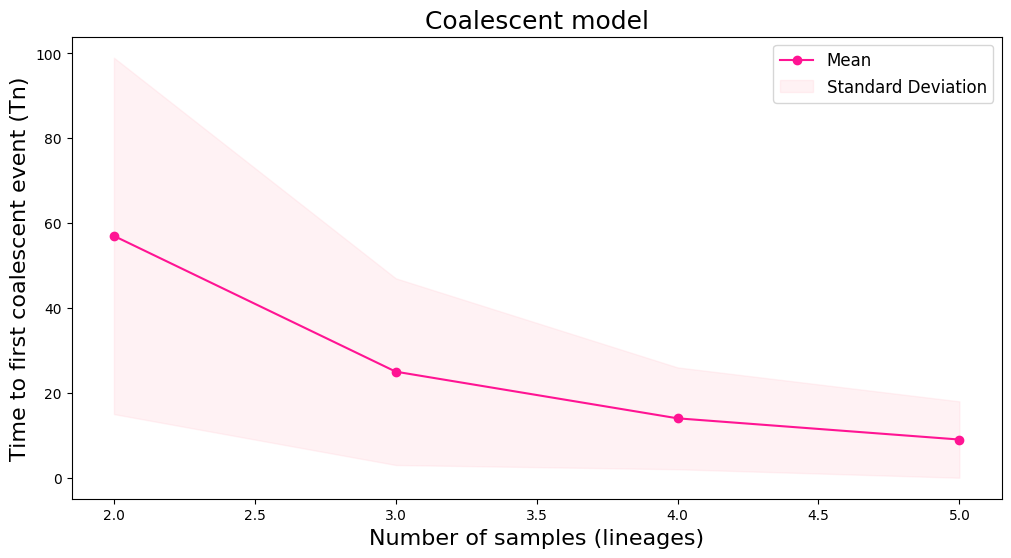

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 6), mean_tn, label='Mean', marker='o', linestyle='-', color='deeppink')
plt.fill_between(range(2, 6), mean_tn_np - std_tn_np, mean_tn_np + std_tn_np, alpha=0.2, color='pink',  label='Standard Deviation')
plt.title('Coalescent model', fontsize=18)
plt.xlabel('Number of samples (lineages)', fontsize=16)
plt.ylabel('Time to first coalescent event (Tn)', fontsize=16)
#plt.yticks(mean_fix_time_list)
plt.legend(loc='upper right', fontsize=12)
plt.show()

# 3. Mutations in the infinite-allele model

In [ ]:
"""
pop_size - number of individuals in population
num_of_generations - number of generations
m - mutation rate
"""
def simulation_with_mutations(pop_size, num_of_generations, m):
    population = np.zeros(pop_size)
    populations = []
    populations.append(population)
    mutation = 1
    mutation_per_generations = []

    for n in range(num_of_generations):

        next_generation = np.random.choice(population, size=pop_size)
        mutation_per_generation = 0
        for i in range(pop_size):
            # 0 - no mutation, 1 - mutation
            is_mutated = np.random.choice([0, 1], p = [1-m, m])

            # if allele have mutation, create a new allele
            if (is_mutated == 1):
                mutation_per_generation +=1
                next_generation[i] = mutation
                mutation += 1

        mutation_per_generations.append(mutation_per_generation)
        populations.append(next_generation)
        population = next_generation

    return populations, mutation_per_generations

In [ ]:
new_pop, n_mutation = simulation_with_mutations(1000, 1000, 0.01)

In [ ]:
from collections import Counter

# calculate the fixation index (probability that two randomly chosen alleles are identical)

def calculate_fixation_index(population):
    counts = Counter(population)
    pop_size = len(population)
    proba_same_alleles = 0
    for allele_count in counts.values():
        proba_same_alleles += (allele_count / pop_size) * ((allele_count - 1) / (pop_size - 1))

    return proba_same_alleles

In [ ]:
mu = 0.00001
N = 1000

populations_with_low_mutation, num_mutations = simulation_with_mutations(N, 1000, mu)
fix_index_list = []

for population in populations_with_low_mutation:
    fix_index_list.append(calculate_fixation_index(population))

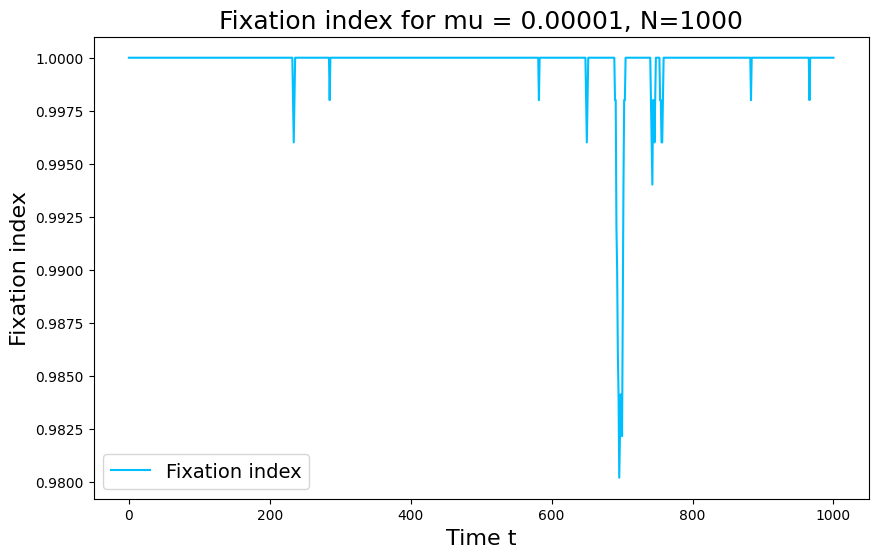

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(fix_index_list)), fix_index_list, label='Fixation index', linestyle='-', color='deepskyblue')
plt.title('Fixation index for mu = 0.00001, N=1000', fontsize=18)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Fixation index', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [ ]:
mu2 = 0.01
N2 = 1000

populations_with_high_mutation, num_mutations = simulation_with_mutations(N2, 1000, mu2)
fix_index_list2 = []

for population in populations_with_high_mutation:
    fix_index_list2.append(calculate_fixation_index(population))

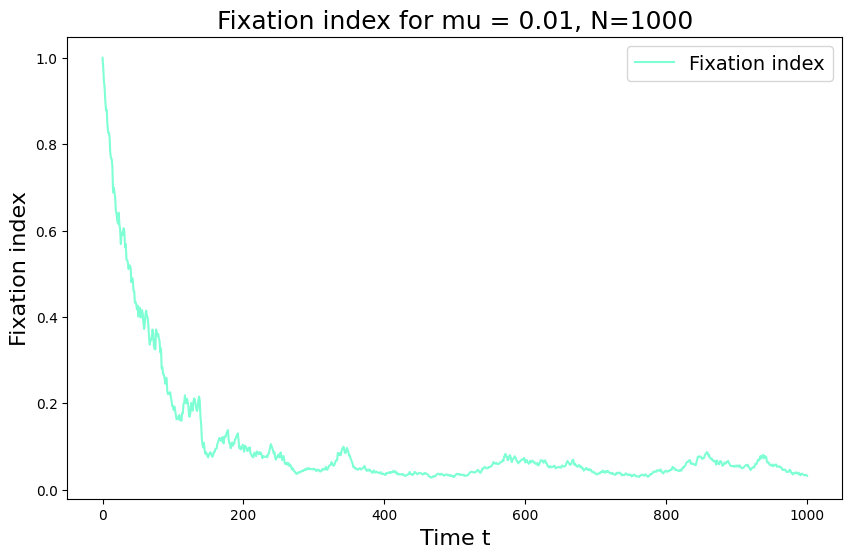

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(fix_index_list2)), fix_index_list2, label='Fixation index', linestyle='-', color='aquamarine')
plt.title('Fixation index for mu = 0.01, N=1000', fontsize=18)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Fixation index', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [ ]:
mu3 = 0.0005
N = 1000

populations_with_half_mutation, num_mutations = simulation_with_mutations(N, 10000, mu3)
fix_index_list3 = []

for population in populations_with_half_mutation:
    fix_index_list3.append(calculate_fixation_index(population))

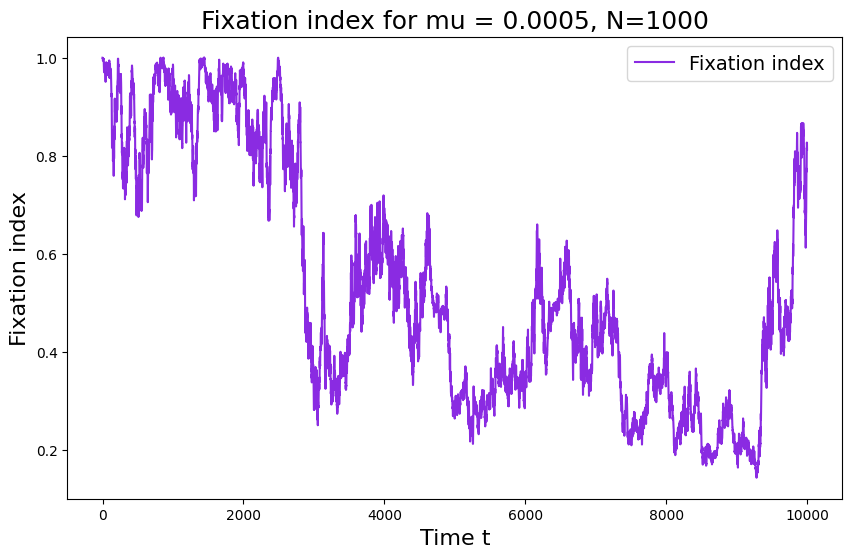

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(fix_index_list3)), fix_index_list3, label='Fixation index', linestyle='-', color='blueviolet')
plt.title('Fixation index for mu = 0.0005, N=1000', fontsize=18)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Fixation index', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# 4. Selection

In [ ]:
def selection_simulation(pop_size, num_of_generations, s):

    # initial A frequency
    p0 = 0.5
    # initial B frequency
    q0 = 0.5

    population = np.random.choice([0, 1], size = pop_size, p = [p0, q0])
    populations = []
    populations.append(population)

    A_freq = []
    B_freq = []

    for generation in range(num_of_generations):
        # calculate allele frequencies
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size

        A_freq.append(freq_A)
        B_freq.append(freq_B)

        p_next = (1 * freq_A) / (1 * freq_A + (1 + s) * freq_B)
        q_next = ((1 + s) * freq_B ) / (1 * freq_A + (1 + s) * freq_B)

        next_generation = np.random.choice([0, 1], size = pop_size, p = [p_next, q_next])
        populations.append(next_generation)
        population = next_generation

    return populations, A_freq, B_freq

In [ ]:
populations_pos, A_freq_pos, B_freq_pos = selection_simulation(1000, 1000, 0.01)

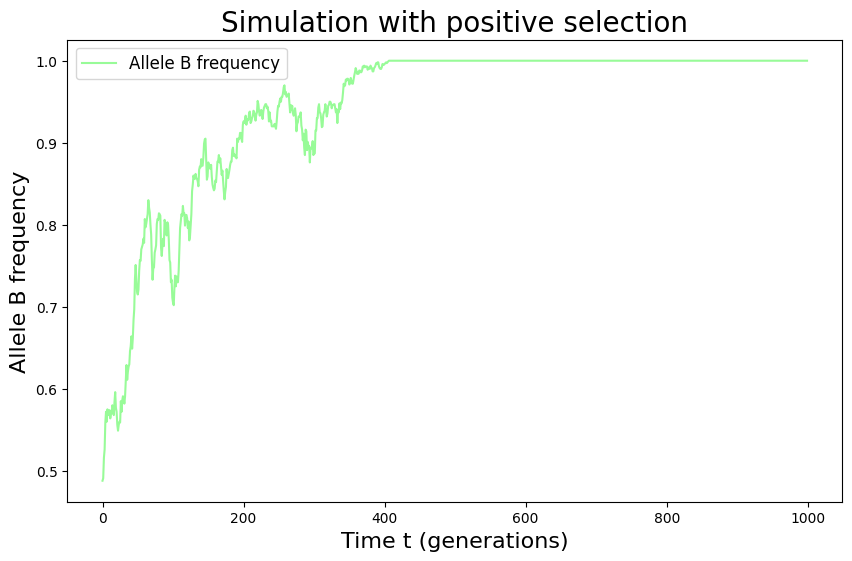

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(B_freq_pos)), B_freq_pos, label='Allele B frequency', linestyle='-', color='palegreen')
plt.title ('Simulation with positive selection', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele B frequency', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [ ]:
populations_neg, A_freq_neg, B_freq_neg = selection_simulation(1000, 1000, -0.01)

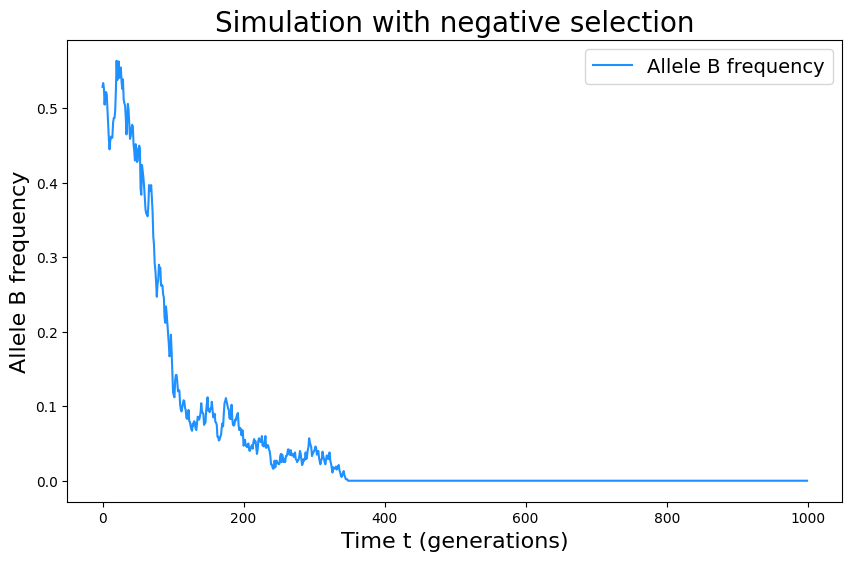

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1000), B_freq_neg, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.title ('Simulation with negative selection', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele B frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# 5. Clonal interference

In [18]:
def clonal_interference_stop(pop_size, s1, s2, s3):

    # initial A frequency
    pA_0 = 0.79
    # initial B frequency
    pB_0  = 0.2
    # initial C frequency
    pC_0  = 0.01

    population = np.random.choice([0, 1, 2], size = pop_size, p = [pA_0, pB_0, pC_0])
    populations = []
    populations.append(population)

    A_freq = []
    B_freq = []
    C_freq = []

    flag = 0
    t = 0

    while flag == 0:
        # calculate allele frequencies
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size
        freq_C = np.sum(population == 2) / pop_size

        A_freq.append(freq_A)
        B_freq.append(freq_B)
        C_freq.append(freq_C)

        if (freq_A == 1) or (freq_B == 1) or (freq_C == 1):
            flag = 1
        else:
            sum_to_normalise = (1 + s1) * freq_A + (1 + s2) * freq_B + (1 + s3) * freq_C

            pA_next = ((1 + s1) * freq_A) / sum_to_normalise
            pB_next = ((1 + s2) * freq_B ) / sum_to_normalise
            pC_next = ((1 + s3) * freq_C) / sum_to_normalise

            next_generation = np.random.choice([0, 1, 2], size = pop_size, p = [pA_next, pB_next, pC_next])
            populations.append(next_generation)
            population = next_generation
            t +=1
    return populations, A_freq, B_freq, C_freq, t

In [ ]:
pop_sizes = [100, 300, 500, 700, 1000, 2000, 4000, 5000, 6000, 8000]

In [21]:
pop_sizes = [100, 300, 500, 700, 1000, 2000, 4000, 5000, 6000, 8000]
num_of_simulation = 1000
A_fixation_proba = []
B_fixation_proba = []
C_fixation_proba = []

for size in pop_sizes:
    results = np.zeros(num_of_simulation)
    for i in range(num_of_simulation):
        CI_pop, A_freq, B_freq, C_freq, t_test = clonal_interference_stop(size, 0, 0.05, 0.1)
        last_generation_freq = [A_freq[-1], B_freq[-1], C_freq[-1]]
        max_frequency = max(last_generation_freq)
        # choose who fixed fir this simulation 0-A, 1-B, 2-C and then save to results list
        max_index = last_generation_freq.index(max_frequency)
        results[i] = max_index
    # calculate how much each allele was fixed for this population size
    A_fix = np.sum(results == 0)/ len(results)
    B_fix = np.sum(results == 1)/ len(results)
    C_fix = np.sum(results == 2)/ len(results)
    A_fixation_proba.append(A_fix)
    B_fixation_proba.append(B_fix)
    C_fixation_proba.append(C_fix)
    print (f'For population size = {size}:')
    print (f'A fixed in {A_fix} ')
    print (f'B fixed in {B_fix} ')
    print (f'C fixed in {C_fix} \n')

For population size = 100:
A fixed in 0.141 
B fixed in 0.732 
C fixed in 0.127 

For population size = 300:
A fixed in 0.003 
B fixed in 0.653 
C fixed in 0.344 

For population size = 500:
A fixed in 0.0 
B fixed in 0.489 
C fixed in 0.511 

For population size = 700:
A fixed in 0.0 
B fixed in 0.345 
C fixed in 0.655 

For population size = 1000:
A fixed in 0.0 
B fixed in 0.226 
C fixed in 0.774 

For population size = 2000:
A fixed in 0.0 
B fixed in 0.054 
C fixed in 0.946 

For population size = 4000:
A fixed in 0.0 
B fixed in 0.001 
C fixed in 0.999 

For population size = 5000:
A fixed in 0.0 
B fixed in 0.001 
C fixed in 0.999 

For population size = 6000:
A fixed in 0.0 
B fixed in 0.0 
C fixed in 1.0 

For population size = 8000:
A fixed in 0.0 
B fixed in 0.0 
C fixed in 1.0 



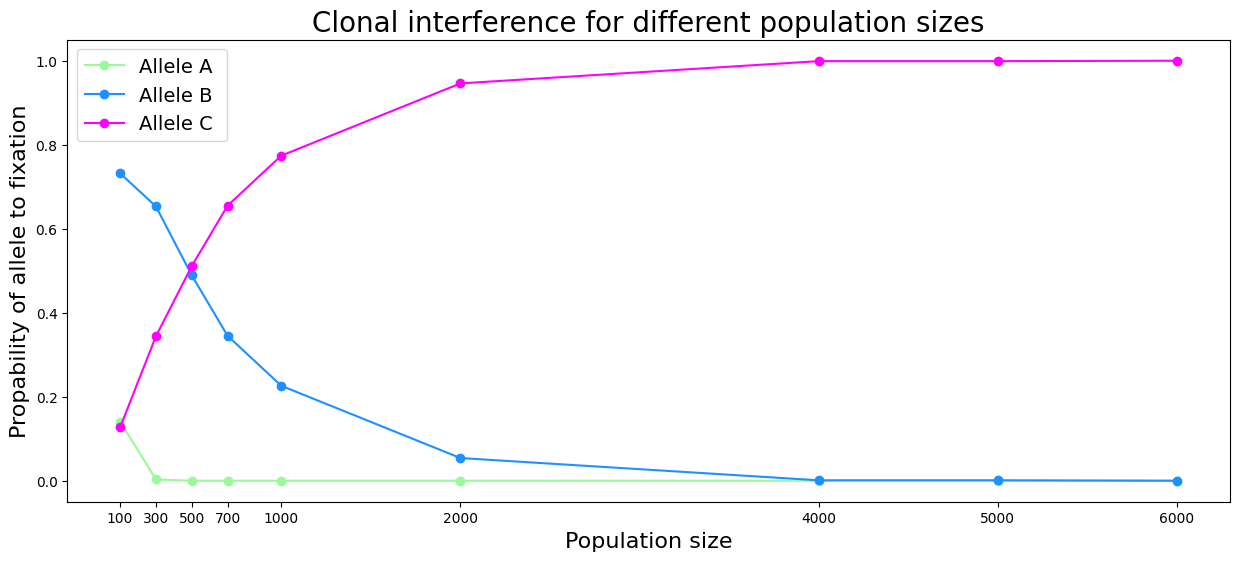

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(pop_sizes[:9], A_fixation_proba[:9], label='Allele A ', linestyle='-', marker = 'o', color='palegreen')
plt.plot(pop_sizes[:9], B_fixation_proba[:9], label='Allele B ', linestyle='-', marker = 'o', color='dodgerblue')
plt.plot(pop_sizes[:9], C_fixation_proba[:9], label='Allele C ', linestyle='-',marker = 'o', color='magenta')
plt.title ('Clonal interference for different population sizes', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.ylabel('Propability of allele to fixation', fontsize=16)
plt.xticks(pop_sizes[:9])
plt.legend(fontsize=14)
plt.show()

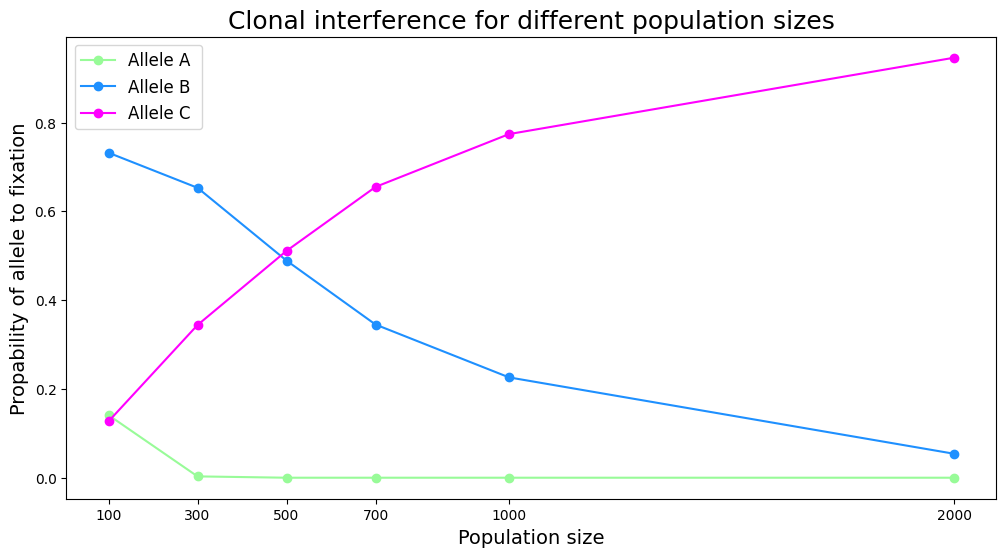

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(pop_sizes[:6], A_fixation_proba[:6], label='Allele A ', linestyle='-', marker = 'o', color='palegreen')
plt.plot(pop_sizes[:6], B_fixation_proba[:6], label='Allele B ', linestyle='-', marker = 'o', color='dodgerblue')
plt.plot(pop_sizes[:6], C_fixation_proba[:6], label='Allele C ', linestyle='-',marker = 'o', color='magenta')
plt.title ('Clonal interference for different population sizes', fontsize=18)
plt.xlabel('Population size', fontsize=14)
plt.ylabel('Propability of allele to fixation', fontsize=14)
plt.xticks(pop_sizes[:6])
plt.legend(fontsize=12)
plt.show()

# 6. Population structure

In [7]:
# calculate frequencies of A and B in 10 subpopulation
# return 2 listS of 10 frequencies for each subpopulation for A and B
def freq_subpop(subpop):
    freq_a = np.zeros(10)
    freq_b = np.zeros(10)

    for i in range(10):
        this_subpop = subpop[i]
        a = np.sum(this_subpop == 0) / (len(this_subpop))
        b = np.sum(this_subpop == 1) / (len(this_subpop))
        freq_a[i] = a
        freq_b[i] = b

    return freq_a, freq_b

In [41]:
# pop_size - population size, num_of_generation - number of generation, p - allele A frequency,

def sub_population_simulation(pop_size, num_of_generation, p):

    # allele B frequency
    q = 1 - p

    population = np.random.choice([0, 1], size = pop_size, p = [p, q])
    split_population = np.array_split(population, 10)
    sub_pop_size = len(split_population[0])
    populations = []
    populations.append(split_population)

    #frequencies for each subpopulation
    A_freq_split = []
    B_freq_split = []
    #frequencies for the whole population
    A_freq_not_split = []
    B_freq_not_split = []

    t_fix = 0

    for generation in range(num_of_generation):
        # calculate allele frequencies
        a_freq_split, b_freq_split = freq_subpop(populations[-1])

        A_freq_split.append(a_freq_split)
        B_freq_split.append(b_freq_split)

        if (set(a_freq_split) != {0.0, 1.0}) and (set(a_freq_split) != {0.0}) and (set(a_freq_split) != {1.0}):
            t_fix += 1

        next_generation = []

        for i in range(10):
            next_generation.append(np.random.choice(populations[-1][i], size=sub_pop_size))

        # add splited 10 subpop
        populations.append(next_generation)

    return populations, A_freq_split, B_freq_split, t_fix

In [42]:
# function that return frequencies A and B for the population in general (without splitting)
def calcul_freq_all_subpop(list_of_generation):
    A_freq = []
    B_freq = []
    for generation in list_of_generation:
        # calculate allele frequencies
        generation_concat = np.concatenate(generation, axis=0)
        freq_A = np.sum(generation_concat == 0) / len(generation_concat)
        freq_B = np.sum(generation_concat == 1) / len(generation_concat)

        A_freq.append(freq_A)
        B_freq.append(freq_B)

    return A_freq, B_freq

In [47]:
population_check, a_check, b_check, fix_time = sub_population_simulation(1000, 1000, 0.5)

In [48]:
a_freq_test, b_freq_test = calcul_freq_all_subpop(population_check)

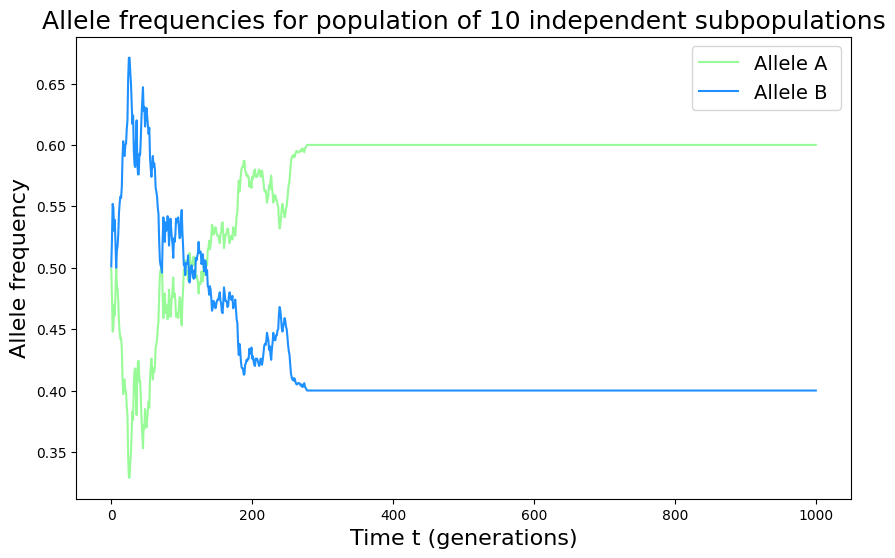

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range (len(a_freq_test)), a_freq_test, label='Allele A ', linestyle='-',  color='palegreen')
plt.plot(range (len(b_freq_test)), b_freq_test, label='Allele B ', linestyle='-', color='dodgerblue')
plt.title ('Allele frequencies for population of 10 independent subpopulations', fontsize=18)
plt.xlabel('Time t (generations)', fontsize=16)
#plt.xticks(pop_sizes[:5])
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [ ]:
# test when we fix depending on N (population size)

In [56]:
# function that will stop when some allele fixed in all sub-populations
# pop_size - population size,  p - allele A frequency

def sub_population_simulation_t_fix(pop_size, p):

    # allele B frequency
    q = 1 - p

    population = np.random.choice([0, 1], size = pop_size, p = [p, q])
    split_population = np.array_split(population, 10)
    sub_pop_size = len(split_population[0])
    populations = []
    populations.append(split_population)

    #frequencies for each subpopulation
    A_freq_split = []
    B_freq_split = []

    t_fix = 0
    flag = 0

    while flag == 0:
        # calculate allele frequencies
        a_freq_split, b_freq_split = freq_subpop(populations[-1])

        A_freq_split.append(a_freq_split)
        B_freq_split.append(b_freq_split)

        if (set(a_freq_split) == {0.0, 1.0}) or (set(a_freq_split) == {0.0}) or (set(a_freq_split) == {1.0}):
            flag = 1
        else:
            t_fix += 1

            next_generation = []

            for i in range(10):
                next_generation.append(np.random.choice(populations[-1][i], size=sub_pop_size))

            # add splited 10 subpop
            populations.append(next_generation)

    return populations, A_freq_split, B_freq_split, t_fix

In [55]:
pop_sizes2 = [100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]

In [57]:
mean_time_fixation= []
std_time_fixation= []

for n in pop_sizes2:
    time_fixation = np.zeros(100)
    for i in range(100):
        pop_check, a_check, b_check, time_fixation[i] = sub_population_simulation_t_fix(n, 0.5)
    mean = np.mean(time_fixation)
    std = np.std(time_fixation)
    mean_time_fixation.append(mean)
    std_time_fixation.append(std)
    print (f'For population size = {n} (10 sub-population with size = {n/10}):\n')
    print (f'Mean number of generations = {np.round(mean)} +- {np.round(std)} generations.\n')

For population size = 100 (10 sub-population with size = 10.0):

Mean number of generations = 31.0 +- 13.0 generations.

For population size = 500 (10 sub-population with size = 50.0):

Mean number of generations = 183.0 +- 75.0 generations.

For population size = 1000 (10 sub-population with size = 100.0):

Mean number of generations = 333.0 +- 114.0 generations.

For population size = 2000 (10 sub-population with size = 200.0):

Mean number of generations = 693.0 +- 289.0 generations.

For population size = 3000 (10 sub-population with size = 300.0):

Mean number of generations = 1005.0 +- 342.0 generations.

For population size = 4000 (10 sub-population with size = 400.0):

Mean number of generations = 1299.0 +- 488.0 generations.

For population size = 5000 (10 sub-population with size = 500.0):

Mean number of generations = 1788.0 +- 599.0 generations.

For population size = 7500 (10 sub-population with size = 750.0):

Mean number of generations = 2504.0 +- 946.0 generations.

For

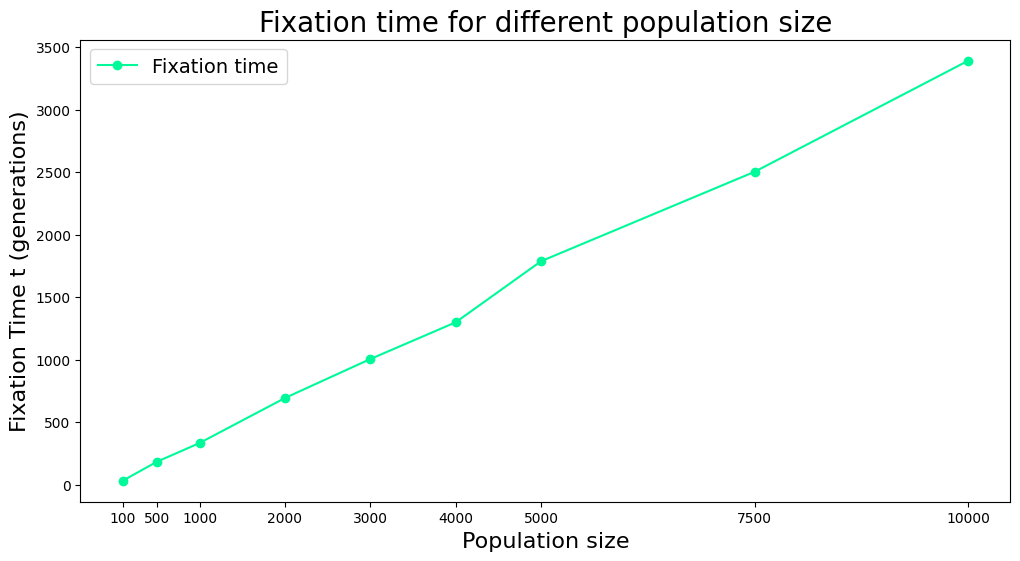

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(pop_sizes2, mean_time_fixation, label='Fixation time', linestyle='-', marker = 'o', color='mediumspringgreen')
plt.title ('Fixation time for different population size', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.xticks(pop_sizes2)
plt.ylabel('Fixation Time t (generations)', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [ ]:
# test when A will fixed depending on initial A frequency p

In [64]:
# pop_size - population size, num_of_generation - number of generation, p - allele A frequency,

def sub_population_simulation_who_fix(pop_size, p):

    # allele B frequency
    q = 1 - p

    population = np.random.choice([0, 1], size = pop_size, p = [p, q])
    split_population = np.array_split(population, 10)
    sub_pop_size = len(split_population[0])
    populations = []
    populations.append(split_population)

    #frequencies for each subpopulation
    A_freq_split = []
    B_freq_split = []

    t_fix = 0
    flag = 0

    while flag == 0:
        # calculate allele frequencies
        a_freq_split, b_freq_split = freq_subpop(populations[-1])

        A_freq_split.append(a_freq_split)
        B_freq_split.append(b_freq_split)

        if (set(a_freq_split) != {0.0, 1.0}) and (set(a_freq_split) != {0.0}) and (set(a_freq_split) != {1.0}):
            t_fix += 1
            next_generation = []

            for i in range(10):
                next_generation.append(np.random.choice(populations[-1][i], size=sub_pop_size))

            # add splited 10 subpop
            populations.append(next_generation)

        else:
            flag = 1
            a_fix_percentage = np.sum(a_freq_split == 1)


    return populations, A_freq_split, B_freq_split, a_fix_percentage, t_fix

In [65]:
populations, A_freq_split, B_freq_split, a_fix_percentage, t_fix = sub_population_simulation_who_fix(100, 0.5)

In [66]:
# how much of all subpopulation will be fixed with A (example, 0.3 - 3/10 subpopulation have only A, 7/10 - only B)
a_fix_percentage

10

In [72]:
A_freq_initial = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mean_a_fix = []
std_a_fix = []

for p in A_freq_initial:
    a_fix_prob = np.zeros(100)
    for i in range(100):
        populations, A_freq_split, B_freq_split, a_fix_prob[i] , t_fix = sub_population_simulation_who_fix(1000, p)
    mean = np.mean(a_fix_prob)
    std = np.std(a_fix_prob)
    mean_a_fix.append(mean)
    std_a_fix.append(std)
    print (f'For p (initial frequency of A) = {p}:\n')
    print (f'Allele A will fixe in {round(mean)} +- {round(std) } sub-populations \n')

For p (initial frequency of A) = 0:

Allele A will fixe in 0 +- 0 sub-populations 

For p (initial frequency of A) = 0.1:

Allele A will fixe in 1 +- 1 sub-populations 

For p (initial frequency of A) = 0.2:

Allele A will fixe in 2 +- 1 sub-populations 

For p (initial frequency of A) = 0.3:

Allele A will fixe in 3 +- 1 sub-populations 

For p (initial frequency of A) = 0.4:

Allele A will fixe in 4 +- 2 sub-populations 

For p (initial frequency of A) = 0.5:

Allele A will fixe in 5 +- 1 sub-populations 

For p (initial frequency of A) = 0.6:

Allele A will fixe in 6 +- 2 sub-populations 

For p (initial frequency of A) = 0.7:

Allele A will fixe in 7 +- 2 sub-populations 

For p (initial frequency of A) = 0.8:

Allele A will fixe in 8 +- 1 sub-populations 

For p (initial frequency of A) = 0.9:

Allele A will fixe in 9 +- 1 sub-populations 

For p (initial frequency of A) = 1:

Allele A will fixe in 10 +- 0 sub-populations 



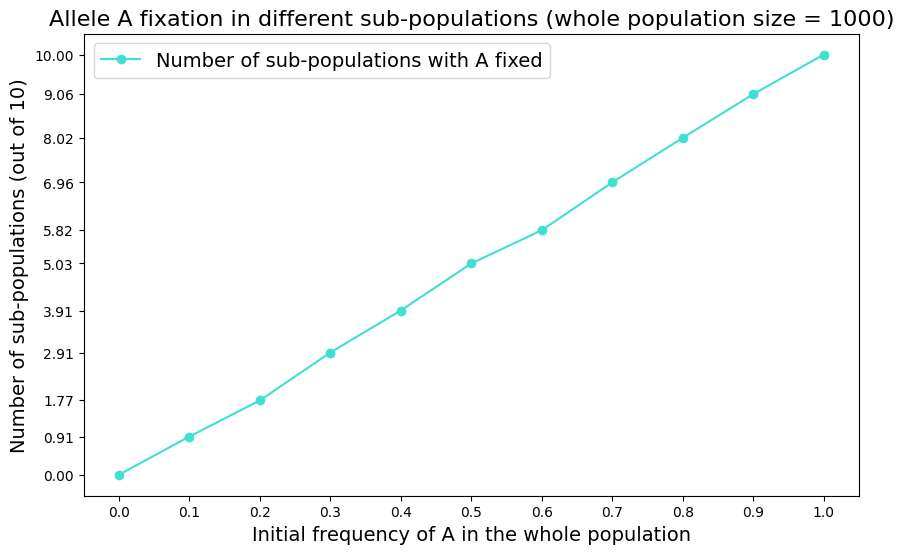

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(A_freq_initial, mean_a_fix, label='Number of sub-populations with A fixed', linestyle='-', marker = 'o', color='turquoise')
#plt.fill_between(A_freq_initial, np_mean_a_fix - np_std_a_fix, np_mean_a_fix + np_std_a_fix, alpha=0.2, color='forestgreen',  label='Standard Deviation for the number of sub-populations')
plt.title ('Allele A fixation in different sub-populations (whole population size = 1000)', fontsize=16)
plt.xlabel('Initial frequency of A in the whole population', fontsize=14)
plt.xticks(A_freq_initial)
plt.yticks(mean_a_fix)
plt.ylabel('Number of sub-populations (out of 10)', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

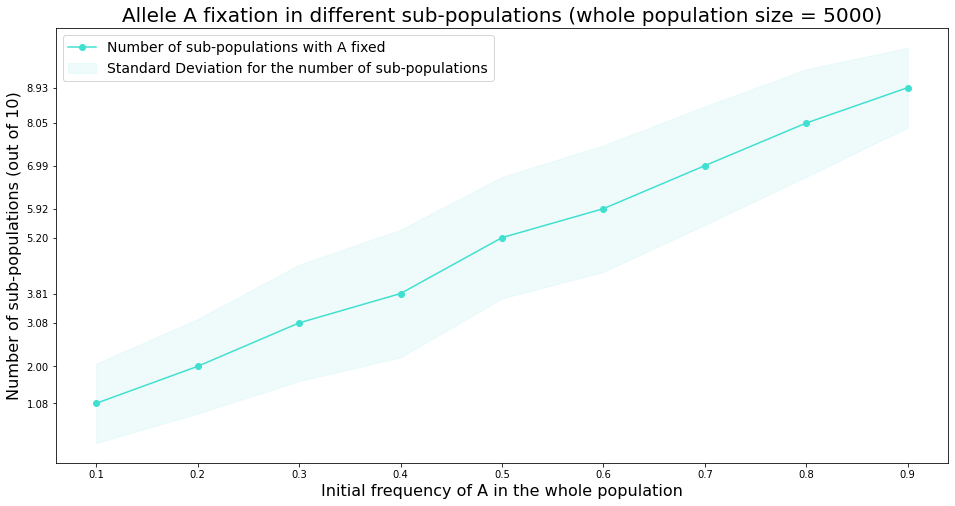

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(A_freq_initial, np_mean_a_fix_5000 , label='Number of sub-populations with A fixed', linestyle='-', marker = 'o', color='turquoise')
# Plot an area around the mean using fill_between to represent the standard deviation
plt.fill_between(A_freq_initial, np_mean_a_fix_5000 - np_std_a_fix_5000, np_mean_a_fix_5000 + np_std_a_fix_5000, alpha=0.2, color='paleturquoise',  label='Standard Deviation for the number of sub-populations')
plt.title ('Allele A fixation in different sub-populations (whole population size = 5000)', fontsize=20)
plt.xlabel('Initial frequency of A in the whole population', fontsize=16)
plt.xticks(A_freq_initial)
plt.yticks(np_mean_a_fix_5000)
plt.ylabel('Number of sub-populations (out of 10)', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.show()

# 7. Migration

In [2]:
# function that migrate 10% of each sub-population to another sub-population, pairs will be choosen randomly
def migration(population10):

    pairs_for_migration = np.arange(10)
    np.random.shuffle(pairs_for_migration)

    subpop_size = len(population10[0])
    not_migr = round(subpop_size * 0.9)
    #migr = subpop_size - not_migr
    population_after_migration = [np.zeros(subpop_size)] * 10

    for i in range(0, 10, 2):

        n1 = pairs_for_migration[i]
        n2 = pairs_for_migration[i+1]
        #print (n1, n2, '\n')
        subpop1 = population10[n1]
        subpop2 = population10[n2]

        new1 = np.concatenate((subpop1[:not_migr], subpop2[not_migr:]), axis=0)
        new2 = np.concatenate((subpop2[:not_migr], subpop1[not_migr:]), axis=0)

        population_after_migration[n1] = new1
        population_after_migration[n2] = new2

    return population_after_migration

In [3]:
# pop_size - population size, p - allele A frequency,
# simulating until fixation in every sub-population (first fixation, then might be changed because of migration for the next generation)
def simulation_with_migration(pop_size, p):

    # allele B frequency
    q = 1 - p

    population = np.random.choice([0, 1], size = pop_size, p = [p, q])
    split_population = np.array_split(population, 10)
    sub_pop_size = len(split_population[0])
    populations = []
    populations.append(split_population)

    #frequencies for each subpopulation
    A_freq_split = []
    B_freq_split = []
    #frequencies for the whole population
    A_freq_not_split = []
    B_freq_not_split = []

    t_fix = 0
    flag = 0

    while flag == 0:
        # calculate allele frequencies
        a_freq_split, b_freq_split = freq_subpop(populations[-1])

        A_freq_split.append(a_freq_split)
        B_freq_split.append(b_freq_split)

        if (set(a_freq_split) == {0.0, 1.0}) or (set(a_freq_split) == {0.0}) or (set(a_freq_split) == {1.0}):
            flag = 1
        else:
            t_fix += 1

            next_generation = []

            for i in range(10):
                next_generation.append(np.random.choice(populations[-1][i], size=sub_pop_size))

            next_generation_migration = migration(next_generation)

            # add splited 10 subpop
            populations.append(next_generation_migration)

    return populations, A_freq_split, B_freq_split, t_fix

In [85]:
pop_sizes3 = [100, 500, 1000, 5000, 10000]
mean_time_fixation= []
std_time_fixation= []
median_time_fixation = []

for n in pop_sizes3:
    time_fixation = np.zeros(100)
    for i in range(100):
        pop_check, a_check, b_check, time_fixation[i] = simulation_with_migration(n, 0.5)
    mean = np.mean(time_fixation)
    std = np.std(time_fixation)
    median = np.median(time_fixation)
    mean_time_fixation.append(np.round(mean))
    std_time_fixation.append(np.round(std))
    median_time_fixation.append(median)
    print (f'For population size = {n} (10 sub-population with size = {n/10}):\n')
    print (f'Mean number of generations = {np.round(mean)} +- {np.round(std)} generations, median = {median} generations\n')

For population size = 100 (10 sub-population with size = 10.0):

Mean number of generations = 178.0 +- 128.0 generations, median = 143.0 generations

For population size = 500 (10 sub-population with size = 50.0):

Mean number of generations = 754.0 +- 527.0 generations, median = 620.5 generations

For population size = 1000 (10 sub-population with size = 100.0):

Mean number of generations = 1209.0 +- 931.0 generations, median = 973.0 generations

For population size = 5000 (10 sub-population with size = 500.0):

Mean number of generations = 7016.0 +- 5042.0 generations, median = 5886.5 generations

For population size = 10000 (10 sub-population with size = 1000.0):

Mean number of generations = 13509.0 +- 10728.0 generations, median = 10385.5 generations



In [86]:
mean_time_fixation_np = np.array(mean_time_fixation)
std_time_fixation_np = np.array(std_time_fixation)

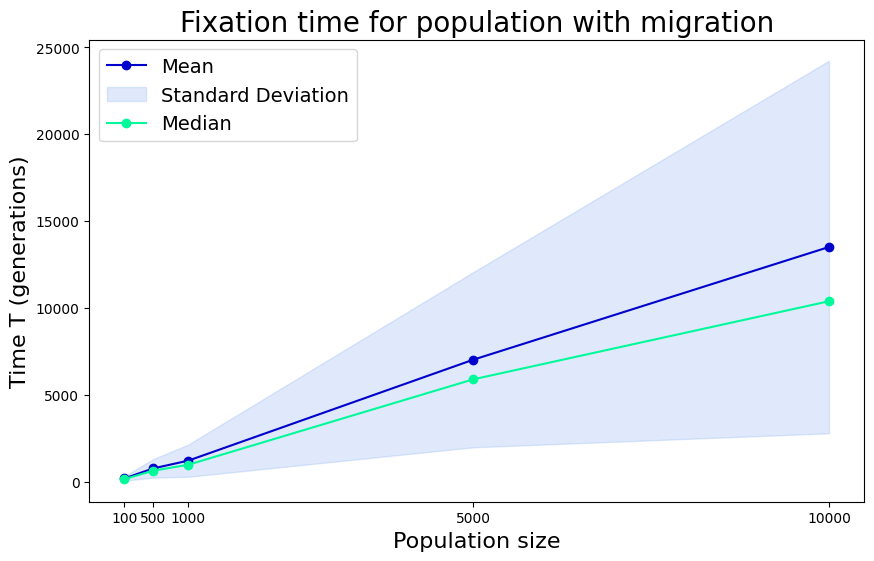

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(pop_sizes3, mean_time_fixation_np , label='Mean', linestyle='-', marker = 'o', color='mediumblue')
plt.fill_between(pop_sizes3, mean_time_fixation_np - std_time_fixation_np, mean_time_fixation_np + std_time_fixation_np, alpha=0.2, color='cornflowerblue',  label='Standard Deviation')
plt.plot(pop_sizes3, median_time_fixation , label='Median', linestyle='-', marker = 'o', color='mediumspringgreen')
plt.title ('Fixation time for population with migration', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.xticks(pop_sizes3)
#plt.yticks(mean_time_fixation_np)
plt.ylabel('Time T (generations)', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.show()

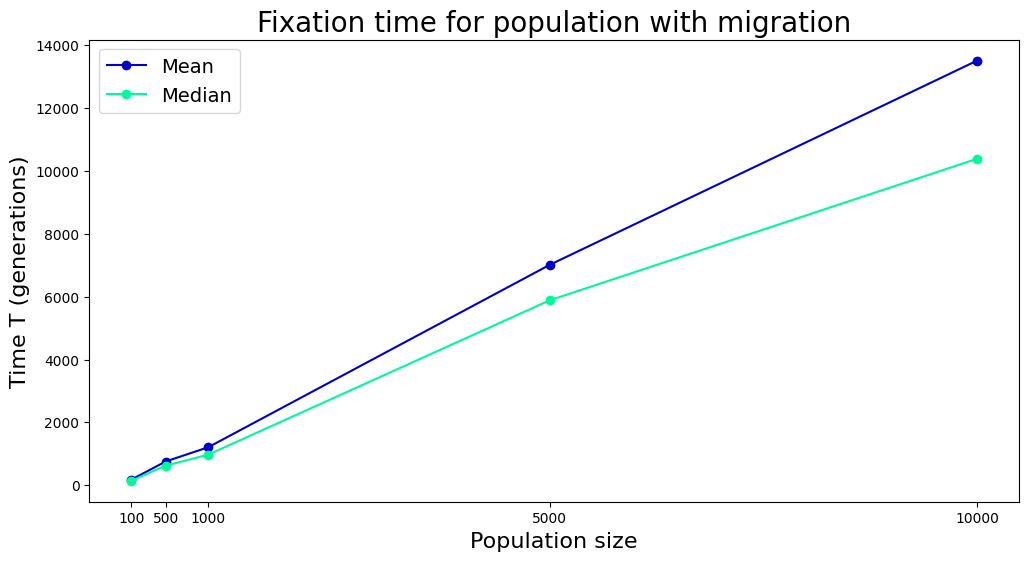

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(pop_sizes3, mean_time_fixation_np , label='Mean', linestyle='-', marker = 'o', color='mediumblue')
#plt.fill_between(pop_sizes3, mean_time_fixation_np - std_time_fixation_np, mean_time_fixation_np + std_time_fixation_np, alpha=0.2, color='cornflowerblue',  label='Standard Deviation')
plt.plot(pop_sizes3, median_time_fixation , label='Median', linestyle='-', marker = 'o', color='mediumspringgreen')
plt.title ('Fixation time for population with migration', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.xticks(pop_sizes3)
#plt.yticks(mean_time_fixation_np)
plt.ylabel('Time T (generations)', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.show()